# Volatility Clusters
1. Produce volatility charts (historical and implied).
2. Identify volatility clusters on volatility charts.
3. Fit a GARCH(1,1) model to the price data.
4. Write the resulting GARCH(1,1) model.

## 1. Volatility charts
### Steps:
- Download volatility data for a stock in Bloomberg (e.g.IBM). Use (stock ticker) GO, then HVT and GO, select the
range (1 year of data), click Actions, export to Excel.
- In R do a plot of the 30-day historical vol and the implied vol superimposed (i.e. on the same chart).

In [1]:
mydata <- read.csv("data/IBM_vol.csv") 
summary(mydata)
colnames(mydata)  # names of the columns of the data.
dat=mydata[1]   # gives first column (Date).
price=mydata[2]
hist=mydata[4]  # gives 30 days historical vol.
impl=mydata[7]  # gives implied vol.
class(dat)      # class data.frame.

     ï..Date    IBM.US.Equity.Price IBM.US.Equity.Hist.Vol..10.
 05/15/17:  1   Min.   :139.7       Min.   : 6.589             
 05/16/17:  1   1st Qu.:145.1       1st Qu.: 8.402             
 05/17/17:  1   Median :148.4       Median :10.360             
 05/18/17:  1   Mean   :149.1       Mean   :14.050             
 05/19/17:  1   3rd Qu.:153.6       3rd Qu.:12.752             
 05/22/17:  1   Max.   :162.1       Max.   :51.512             
 (Other) :123                                                  
 IBM.US.Equity.Hist.Vol..30. IBM.US.Equity.Hist.Vol..50.
 Min.   : 8.799              Min.   : 9.218             
 1st Qu.:10.340              1st Qu.:13.380             
 Median :13.909              Median :13.741             
 Mean   :15.196              Mean   :14.969             
 3rd Qu.:16.352              3rd Qu.:16.242             
 Max.   :28.769              Max.   :23.050             
                                                        
 IBM.US.Equity.Hist.Vol..100. IB

[1] "ï..Date"                      "IBM.US.Equity.Price"         
[3] "IBM.US.Equity.Hist.Vol..10."  "IBM.US.Equity.Hist.Vol..30." 
[5] "IBM.US.Equity.Hist.Vol..50."  "IBM.US.Equity.Hist.Vol..100."
[7] "IBM.US.Equity.Implied.Vol"

[1] "data.frame"

In [2]:
hist=as.vector(as.matrix(hist))  # convert from data.frame class to vector.
dat=as.Date(mydata$ï..Date,"%m/%d/%Y")
impl=as.vector(as.matrix(impl))
price=as.vector(as.matrix(price))

## 2. Volatility clusters
`"large changes tend to be followed by large changes, of either sign, and small changes tend to be followed by small changes.`” Mandelbrot (1963)
- GARCH and stochastic volatility models are aimed at this.
- GARCH(1,1): Squared volatility depends on last period’s volatility.
$$
\begin{split}
Y_t & = \sigma_t \epsilon_t \\
\sigma_t^2 & = \alpha_0 + \alpha_1 Y_{t-1}^2 + \beta_1 \sigma_{t-1}^2
\end{split}
$$
- These models ”propose statistical constructions which mimick volatility clustering in financial time series, but do not provide economic explanation for it” Cont (2005).


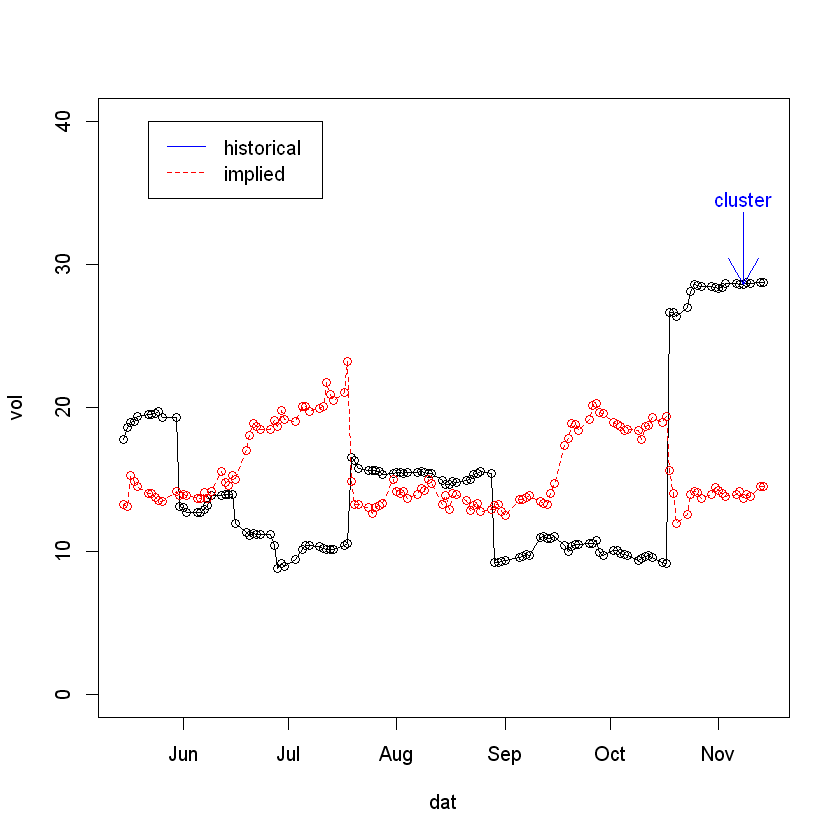

In [3]:
# Plot historical and implied vol superimposed.
plot(dat,hist,type="o",ylim=c(0,40),ylab="vol")
par(new=T)
plot(dat,impl,type="o",col="red",ylim=c(0,40),ylab="vol",lty=2)
legend(dat[124],40,c("historical","implied"),col=c("blue","red"), lty=1:2)
arrows(dat[5],hist[5]+5,dat[5],hist[5],col="blue")
text(dat[5],hist[5]+6,"cluster",col="blue")

## 3. Fit GARCH(1,1)
- Use the downloaded price data.
- Compute the log-returns.
- Load R package tseries: require(tseries).
- Use the function garch() for the log-returns.
- Output the coefficients of the model.
Write the model (where do you use $\alpha_0, \alpha_1, \beta_1$?)

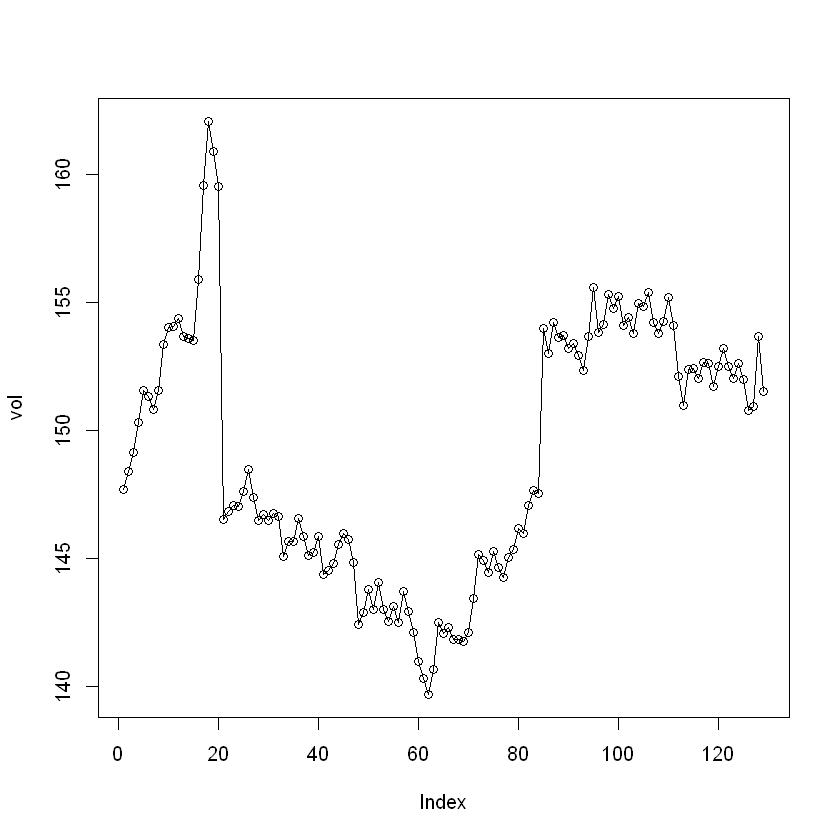

In [4]:
plot(price,type="o",ylab="vol")

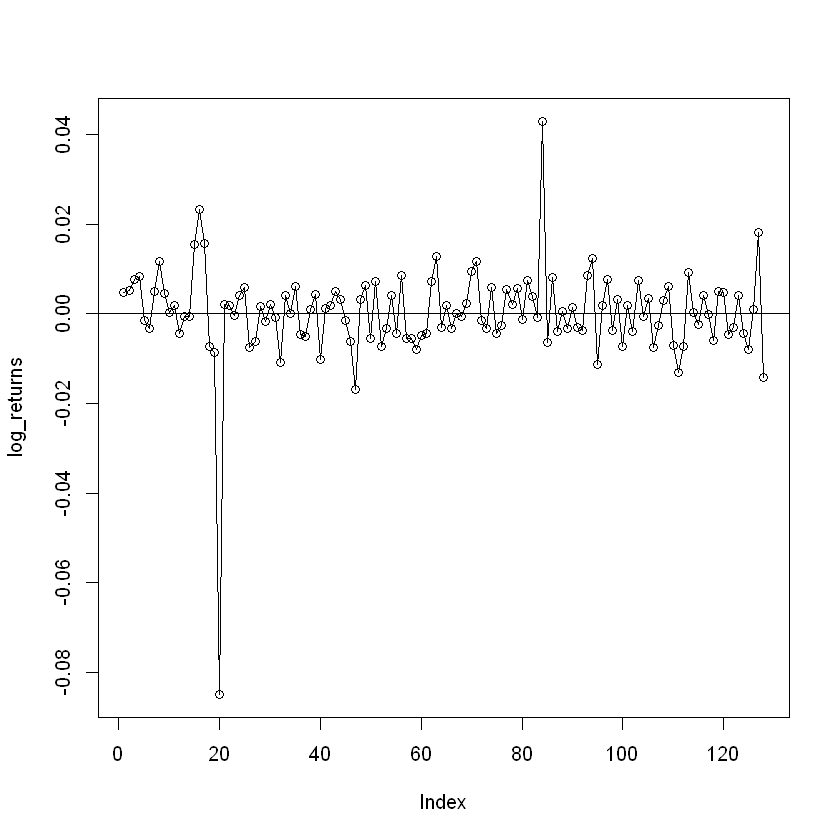

In [5]:
# Compute log-returns of prices.
log_returns = diff(log(price), lag=1)
plot(log_returns,type="o")
abline(h=0)

In [10]:
# Fit GARCH(1,1).
require(tseries)
garch(log_returns)
summary(garch)


 ***** ESTIMATION WITH ANALYTICAL GRADIENT ***** 


     I     INITIAL X(I)        D(I)

     1     1.033871e-04     1.000e+00
     2     5.000000e-02     1.000e+00
     3     5.000000e-02     1.000e+00

    IT   NF      F         RELDF    PRELDF    RELDX   STPPAR   D*STEP   NPRELDF
     0    1 -5.123e+02
     1   11 -5.124e+02  2.22e-05  5.20e-05  2.4e-05  4.7e+09  2.4e-06  1.24e+05
     2   12 -5.124e+02  5.06e-07  5.97e-07  1.9e-05  2.0e+00  2.4e-06  2.59e-03
     3   13 -5.124e+02  3.99e-09  8.37e-09  1.9e-05  2.0e+00  2.4e-06  2.58e-03
     4   21 -5.124e+02  8.54e-05  6.13e-05  1.4e-01  1.8e+00  1.9e-02  2.59e-03
     5   23 -5.126e+02  3.17e-04  2.22e-04  1.9e-01  2.0e+00  3.9e-02  4.72e-01
     6   25 -5.126e+02  8.55e-05  8.18e-05  3.1e-02  2.0e+00  7.8e-03  5.50e+01
     7   28 -5.126e+02  1.79e-06  1.78e-06  6.0e-04  2.0e+00  1.6e-04  6.44e+03
     8   30 -5.126e+02  3.58e-06  3.57e-06  1.2e-03  2.0e+00  3.1e-04  6.29e+05
     9   32 -5.126e+02  7.20e-06  7.17e-06  2.4e-03 


Call:
garch(x = log_returns)

Coefficient(s):
       a0         a1         b1  
1.074e-04  9.464e-02  5.977e-15  


ERROR: Error in object[[i]]: object of type 'closure' is not subsettable
